In [1]:
import os
import torch
from ganomaly_model import *
from data_utils import *
from util import *
import matplotlib.pyplot as plt
import yaml
import numpy as np

In [2]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [3]:
with open('./config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
ganomaly_model = GanomalyModel(
    input_size=(128,128),
    latent_vec_size=100,
    num_input_channels=1,
    n_features=64,
    extra_layers=0,
    add_final_conv_layer=True,
).to(DEVICE)

In [16]:
model_file = os.path.join(os.getcwd(), 'model/DCAS-33/model_ToyCar_epoch80.pt')
ganomaly_model.eval()
ganomaly_model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

## normal

In [19]:
machine_type = 'ToyCar'
target_dir = 'D:/dcase/normal_test_data/ToyCar/'
section_names = get_section_names(target_dir, dir_name='source_test')
print(section_names)

test_files, labels = file_list_generator(target_dir=target_dir,
                                         section_name='section_00',
                                         dir_name='source_test',
                                         mode='dev')

dcase_dataset = DcaseDataset(test_files,
                            labels,
                            config=config,
                            machine_config=config[machine_type],
                            transform=None)

print("============ DATALOADER GENERATOR ============")
data_loader = {'test': None}
data_loader['test'] = get_eval_dataloader(dcase_dataset, config=config, machine_type=machine_type)

target_dir : D:/dcase/normal_test_data/ToyCar/_section_00
Number of audio files : 3


3it [00:00, 150.02it/s]

Feature Shape: (3, 1, 128, 128)
============ DATALOADER GENERATOR ============
test size: 3


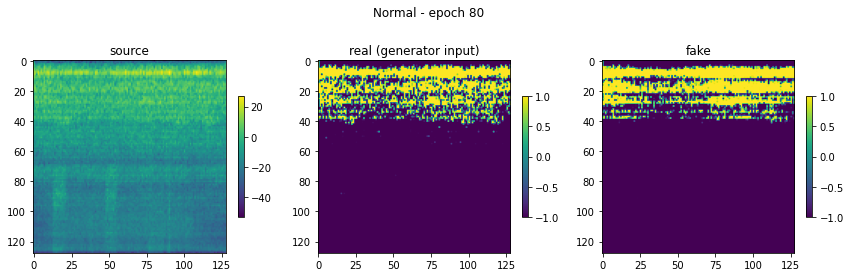

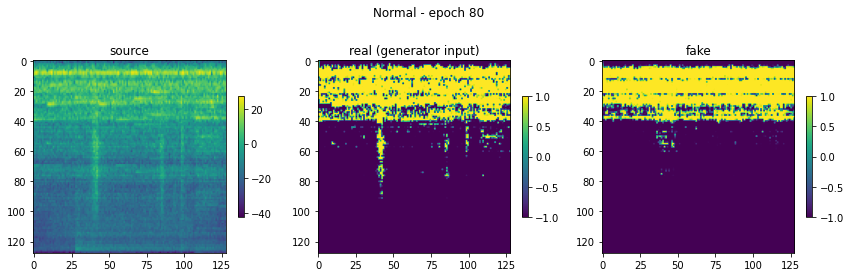

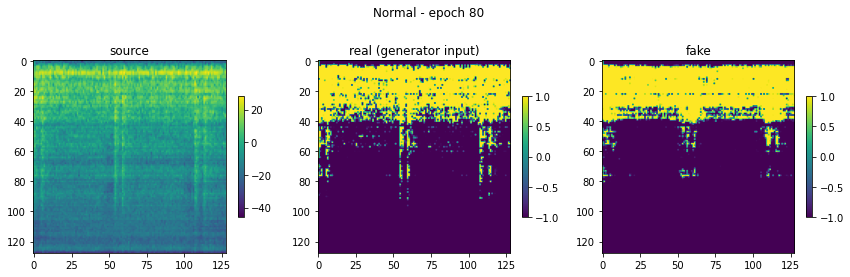

In [20]:
# section 00

for x, s, y in data_loader['test']:
    x = x.to(DEVICE).float()

    padded, fake, latent_i, latent_o = ganomaly_model(x)

    for i in range(3):
        plot_recons(x[i], padded[i], fake[i], anomaly=False, epoch=80, show=True)

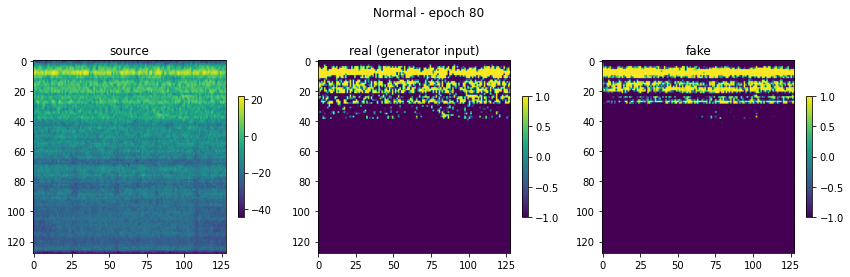

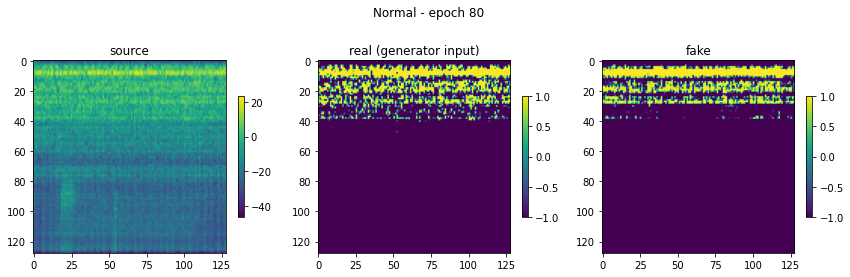

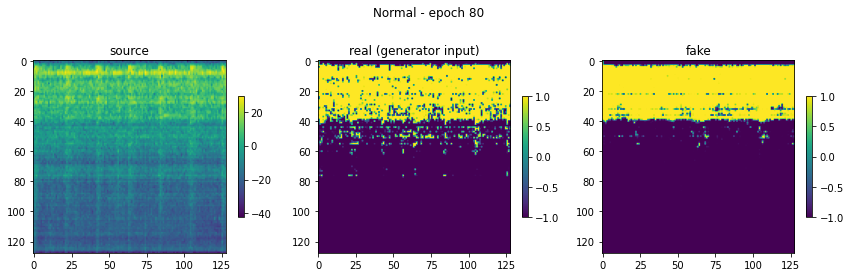

In [18]:
# section 01

for x, s, y in data_loader['test']:
    x = x.to(DEVICE).float()

    padded, fake, latent_i, latent_o = ganomaly_model(x)

    for i in range(3):
        plot_recons(x[i], padded[i], fake[i], anomaly=False, epoch=80, show=True)

## anomaly

In [27]:
machine_type = 'ToyCar'
target_dir = 'D:/dcase/anomaly_test_data/ToyCar/'
section_names = get_section_names(target_dir, dir_name='source_test')
print(section_names)

test_files, labels = file_list_generator(target_dir=target_dir,
                                         section_name='section_00',
                                         dir_name='source_test',
                                         mode='dev')

dcase_dataset = DcaseDataset(test_files,
                            labels,
                            config=config,
                            machine_config=config[machine_type],
                            transform=None)

print("============ DATALOADER GENERATOR ============")
data_loader = {'test': None}
data_loader['test'] = get_eval_dataloader(dcase_dataset, config=config, machine_type=machine_type)

['section_00', 'section_01', 'section_02']
target_dir : D:/dcase/anomaly_test_data/ToyCar/_section_00
Number of audio files : 3


3it [00:00, 250.08it/s]

Feature Shape: (3, 1, 128, 128)
============ DATALOADER GENERATOR ============
test size: 3


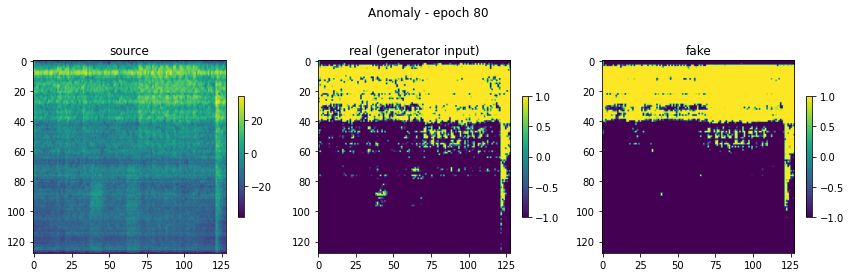

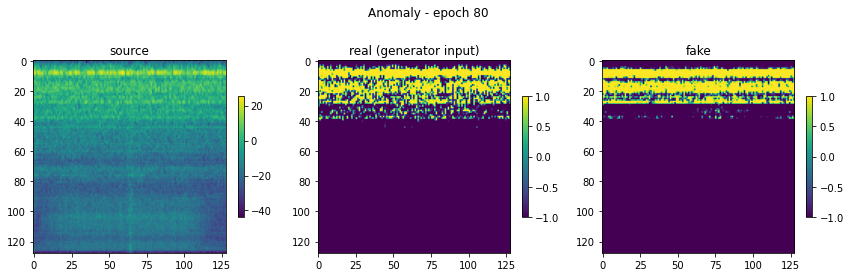

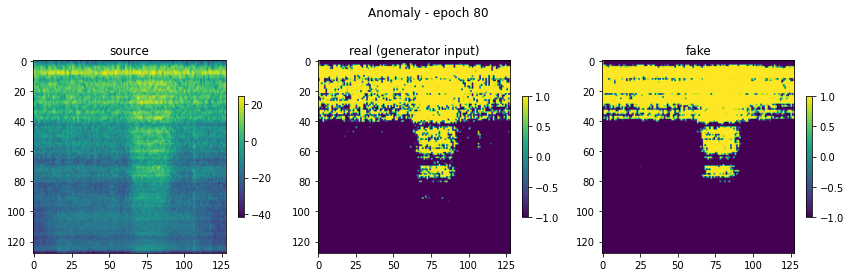

In [28]:
# section 00

for x, s, y in data_loader['test']:
    x = x.to(DEVICE).float()

    padded, fake, latent_i, latent_o = ganomaly_model(x)

    for i in range(3):
        plot_recons(x[i], padded[i], fake[i], anomaly=True, epoch=80, show=True)

In [86]:
target

tensor([[0.]])

In [156]:
np.exp(0.8)

2.225540928492468

In [142]:
tmp = 0.8 * np.log(0.8) + 0.1 * np.log(0.1) + 0.1*np.log(0.1)
-tmp

0.639031859650177

In [137]:
nn.functional.log_softmax(torch.Tensor([[0.6, 0.2, 0.2]]))

C:\Users\SKKU1\AppData\Local\Temp\ipykernel_13772\3601934279.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  nn.functional.log_softmax(torch.Tensor([[0.6, 0.2, 0.2]]))


tensor([[-0.8504, -1.2504, -1.2504]])

In [ ]:
target = 
nn.functional.nll_loss()

In [159]:
tmp = 0.066 * torch.log(torch.Tensor([0.0557])) + 0.066 * torch.log(torch.Tensor([0.0654])) + 0.866*torch.log(torch.Tensor([0.8788]))
tmp

tensor([-0.4825])

In [160]:
tmp = 0.066 * torch.log(torch.Tensor([0.1])) + 0.066 * torch.log(torch.Tensor([0.1])) + 0.866*torch.log(torch.Tensor([0.8]))
tmp

tensor([-0.4972])

In [158]:
tmp = 0.066 * torch.log(torch.Tensor([0.066])) + 0.066 * torch.log(torch.Tensor([0.066])) + 0.866*torch.log(torch.Tensor([0.866]))
tmp

tensor([-0.4834])

In [ ]:
loss1 = np.log(sum(np.exp(output))) - output[target[0]]

In [108]:
tmp = 0.6 * torch.log(torch.Tensor([0.1])) + 0.2 * torch.log(torch.Tensor([0.8])) + 0.2*torch.log(torch.Tensor([0.1]))
tmp 

tensor([-1.8867])

In [33]:
import numpy as np

tmp = 0.8 * np.log10(0.8) + 0.1 * np.log10(0.1) + 0.1*np.log10(0.1)
tmp

-0.27752801040644515

tensor([-0.9503])

-0.639031859650177

In [59]:
np.log(0.6)

-0.5108256237659907

In [32]:
np.log10(0.8)

-0.09691001300805639

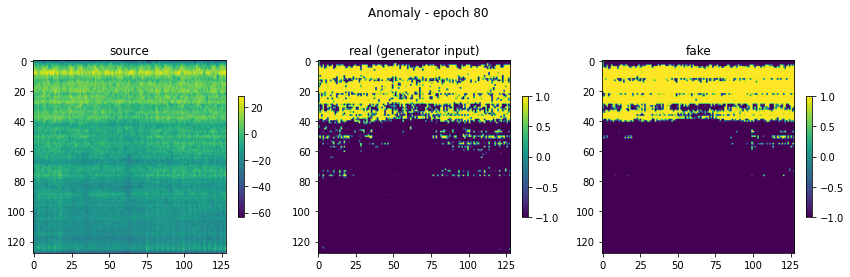

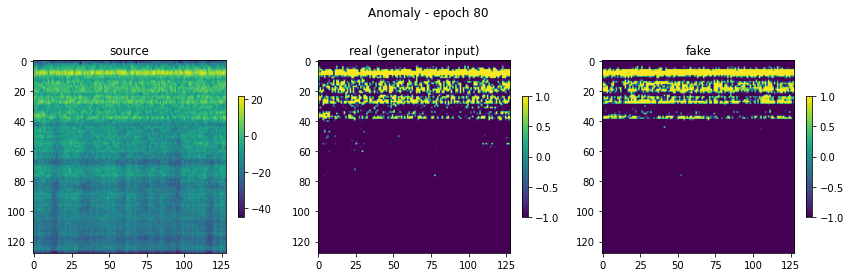

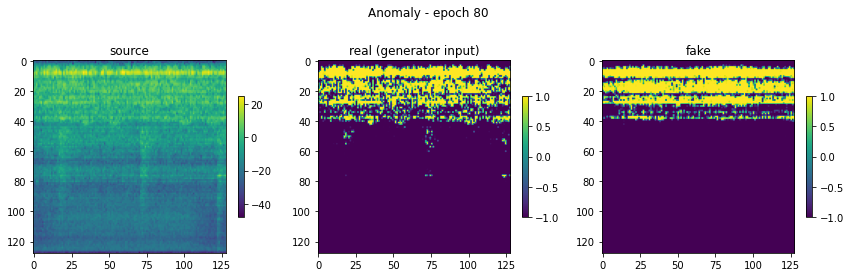

In [25]:
# section 01

for x, s, y in data_loader['test']:
    x = x.to(DEVICE).float()

    padded, fake, latent_i, latent_o = ganomaly_model(x)

    for i in range(3):
        plot_recons(x[i], padded[i], fake[i], anomaly=True, epoch=80, show=True)

# tanh

In [12]:
for i, (x, s, y) in enumerate(data_loader['test']):
    x = x.to(DEVICE).float()

    if i == 0:
        padded, fake, latent_i, latent_o = ganomaly_model(x)
        break
    else:
        continue

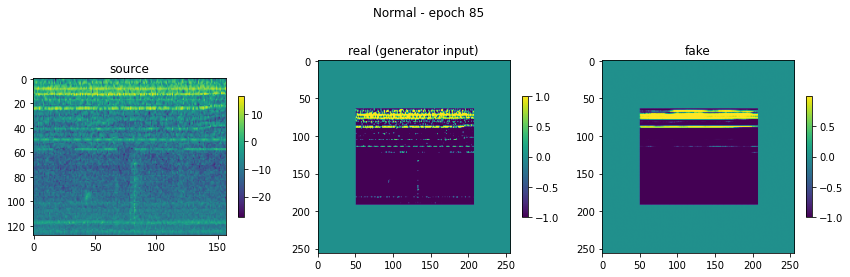

In [13]:
plot_recons(x, padded, fake, anomaly=False, epoch=85, show=True)
# plot_latent(latent_i, latent_o, anomaly=False, epoch=85, show=True)

In [14]:
for i, (x, s, y) in enumerate(data_loader['test']):
    x = x.to(DEVICE).float()

    if i == 100:
        padded, fake, latent_i, latent_o = ganomaly_model(x)
        break
    else:
        continue

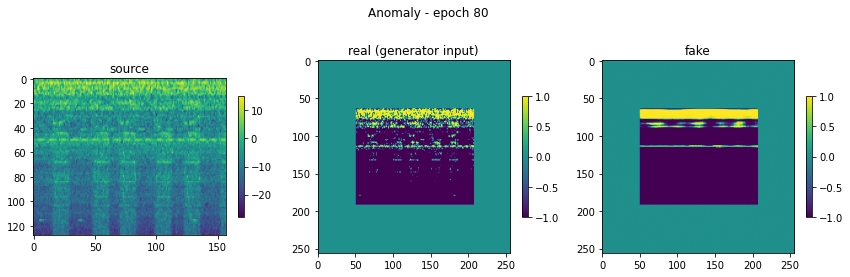

In [16]:
plot_recons(x, padded, fake, anomaly=True, epoch=80, show=True)
# plot_latent(latent_i, latent_o, anomaly=True, epoch=80, show=True)

# normalize

In [12]:
for i, (x, s, y) in enumerate(data_loader['test']):
    x = x.to(DEVICE).float()

    if i == 0:
        padded, fake, latent_i, latent_o = ganomaly_model(x)
        break
    else:
        continue

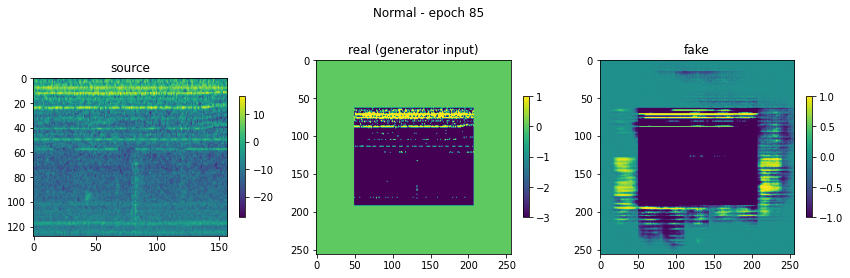

In [13]:
plot_recons(x, padded, fake, anomaly=False, epoch=85, show=True)
# plot_latent(latent_i, latent_o, anomaly=False, epoch=85, show=True)

In [14]:
for i, (x, s, y) in enumerate(data_loader['test']):
    x = x.to(DEVICE).float()

    if i == 100:
        padded, fake, latent_i, latent_o = ganomaly_model(x)
        break
    else:
        continue

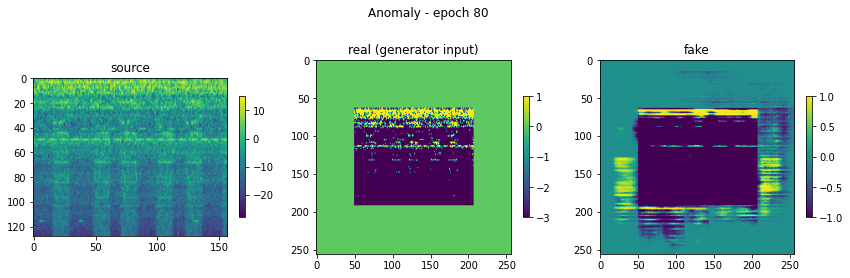

In [15]:
plot_recons(x, padded, fake, anomaly=True, epoch=80, show=True)
# plot_latent(latent_i, latent_o, anomaly=True, epoch=80, show=True)